# load the lidar tiff of stand density

In [2]:
import os
os.getcwd()
os.chdir("/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/")

In [36]:
import rasterio
# file path
raster_fp = 'Stand_density-1.tif'

# open file with rasterio
raster = rasterio.open(raster_fp)
# Check type of the variable 'raster'
type(raster)
# Check projection
print(raster.crs)
# Number of bands
print(raster.count)
# Dimensions
print(raster.width)
print(raster.height)
# Check the Driver (data format)
print(raster.driver)
# No data values for all channels
print(raster.nodatavals)



COMPD_CS["NAD83(2011) / Conus Albers + NAVD88 height - Geoid12B (meters)",PROJCS["NAD83(2011) / Conus Albers",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6350"]],VERT_CS["NAVD88 height",VERT_DATUM["North American Vertical Datum 1988",2005,AUTHORITY["EPSG","5103"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Gravity-related height",UP],AUTHORITY["EPSG","5703"]]]
1
80
100
GTiff
(-99999.0,)


In [37]:
# Check all Metadata of raster file
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -99999.0,
 'width': 80,
 'height': 100,
 'count': 1,
 'crs': CRS.from_wkt('COMPD_CS["NAD83(2011) / Conus Albers + NAVD88 height - Geoid12B (meters)",PROJCS["NAD83(2011) / Conus Albers",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6350"]],VERT_CS["NAVD88 height",VERT_DATUM["North American Vertical Datum 1988",2005,AUTHORITY["EPSG","5103"]],UNIT

## Make a shapefile from the boundary


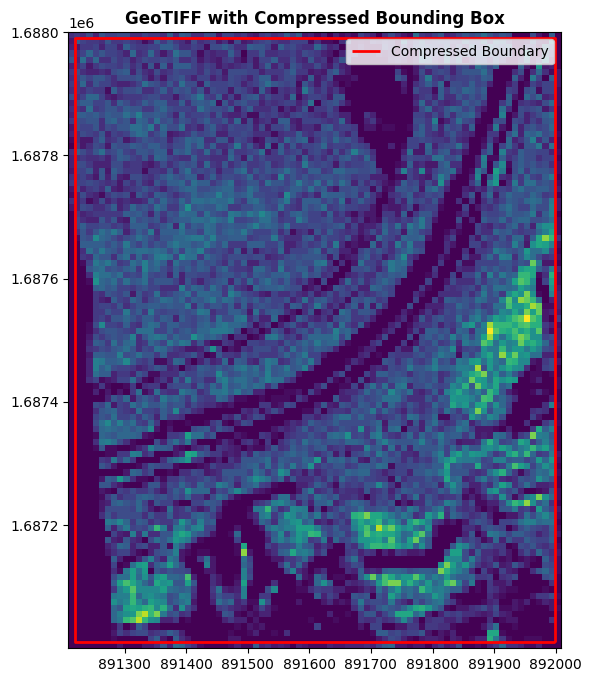

In [12]:
import rasterio
from rasterio.plot import show
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

def geotiff_to_shapefile_and_plot(geotiff_path, shapefile_path, buffer=10):
    # Open the GeoTIFF file
    with rasterio.open(geotiff_path) as dataset:
        # Get the bounding box and apply the inward buffer
        bounds = dataset.bounds
        compressed_polygon = box(
            bounds.left + buffer, bounds.bottom + buffer,
            bounds.right - buffer, bounds.top - buffer
        )
        
        # Create a GeoDataFrame
        gdf = gpd.GeoDataFrame({"geometry": [compressed_polygon]}, crs=dataset.crs)
        
        # Save as a shapefile
        gdf.to_file(shapefile_path, driver="ESRI Shapefile")

        # Plot the raster
        fig, ax = plt.subplots(figsize=(8, 8))
        show(dataset, ax=ax, title="GeoTIFF with Compressed Bounding Box")

        # Plot the compressed bounding box
        gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="Compressed Boundary")

        # Show the plot
        plt.legend()
        plt.show()

# Example usage
geotiff_path = "/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/Stand_density-1.tif"
shapefile_path = "/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/lidar_boundary_shapefile.shp"
geotiff_to_shapefile_and_plot(geotiff_path, shapefile_path)


# Plot the lidar stand density without no data values

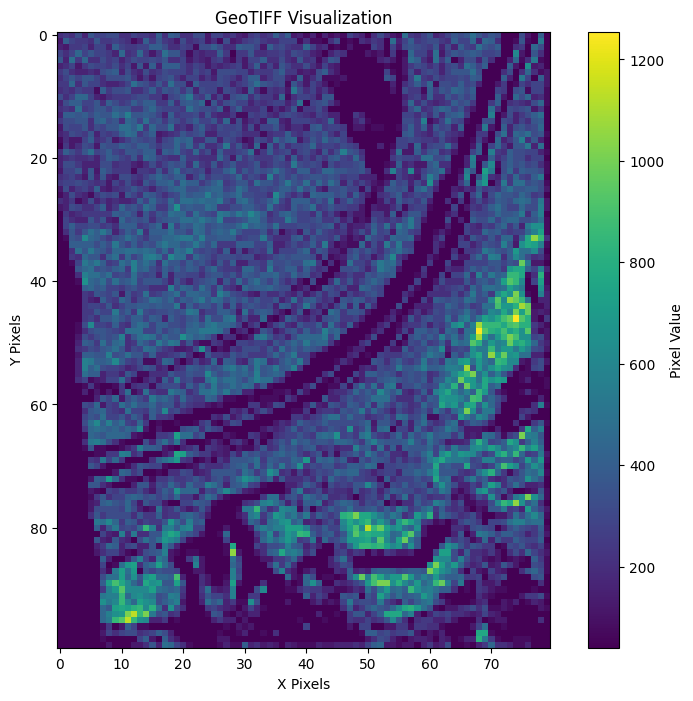

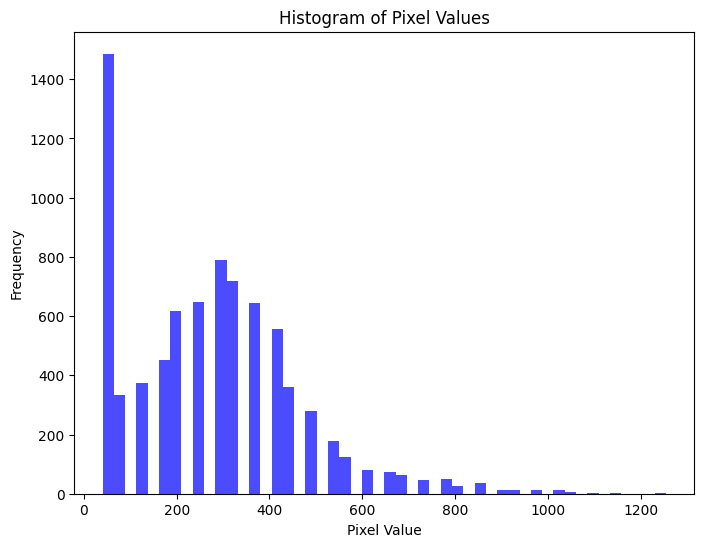

In [38]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
geotiff_path = "/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/Stand_density-1.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -99999
    data = src.read(1)  # Read the first band
    profile = src.profile
    # Mask the no-data values
    band = np.ma.masked_equal(data, src.nodata)

# Plot the image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar
img = plt.imshow(band, cmap=cmap)
plt.colorbar(img, label='Pixel Value')
plt.title("GeoTIFF Visualization")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of pixel values, excluding the no-data values
plt.figure(figsize=(8, 6))
plt.hist(band.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

Still looks like many zeros are in the data that should be essentially no-data values

# Check the Treemap Stand density tiff

In [40]:
raster_fp = 'Treemap data in lidar boundary/TPA_LIVE__Live_Trees_Per_Acre_25-02-17-19-50-13.tif'

# open file with rasterio
raster = rasterio.open(raster_fp)
# Check all Metadata of raster file
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -99999.0,
 'width': 34,
 'height': 39,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(30.0, 0.0, 891105.0,
        0.0, -30.0, 1688085.0)}

# Load the tree map stand density

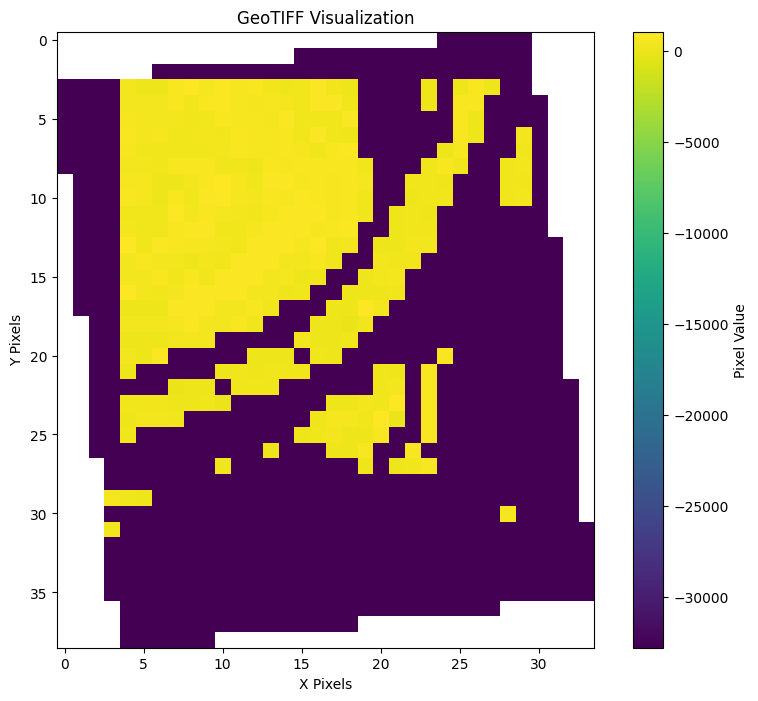

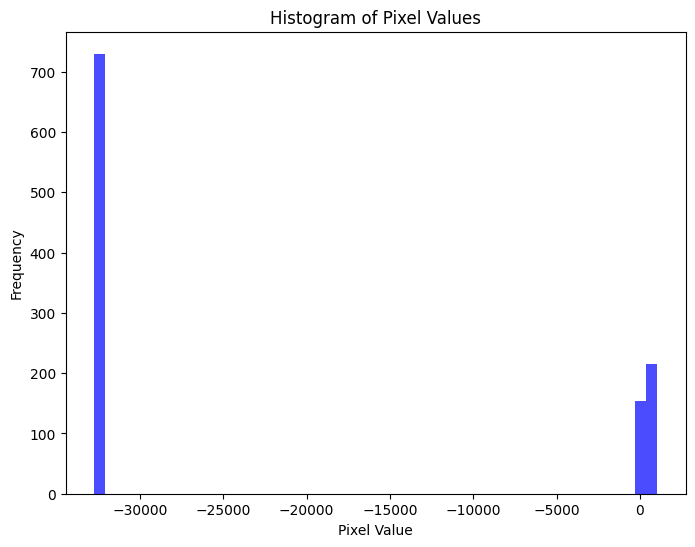

In [51]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
geotiff_path = "/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/Treemap data in lidar boundary/TPA_LIVE__Live_Trees_Per_Acre_25-02-17-19-50-13.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -99999.0
    data = src.read(1)  # Read the first band
    profile = src.profile
    # Mask the no-data values
    band = np.ma.masked_equal(data, src.nodata)

# Plot the image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar
img = plt.imshow(band, cmap=cmap)
plt.colorbar(img, label='Pixel Value')
plt.title("GeoTIFF Visualization")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of pixel values, excluding the no-data values
plt.figure(figsize=(8, 6))
plt.hist(band.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


## Check for minimum pixel value and create a mask for those values

In [42]:
# Get value counts for the raster (excluding no-data values)
unique, counts = np.unique(band.compressed(), return_counts=True)
value_counts = dict(zip(unique, counts))

# Print the value counts
print("Value Counts for the Raster:")
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")

Value Counts for the Raster:
Value: -32768.0, Count: 730
Value: 48.14436721801758, Count: 2
Value: 108.3248291015625, Count: 2
Value: 135.14573669433594, Count: 1
Value: 147.1818389892578, Count: 2
Value: 156.4691925048828, Count: 24
Value: 162.48724365234375, Count: 1
Value: 171.25401306152344, Count: 2
Value: 180.5413818359375, Count: 6
Value: 192.5774688720703, Count: 3
Value: 201.34425354003906, Count: 10
Value: 213.38034057617188, Count: 2
Value: 216.1290740966797, Count: 3
Value: 219.3983917236328, Count: 2
Value: 228.1651611328125, Count: 5
Value: 240.2012481689453, Count: 1
Value: 264.2734375, Count: 6
Value: 276.3095397949219, Count: 5
Value: 288.3456115722656, Count: 2
Value: 297.63299560546875, Count: 4
Value: 315.1665344238281, Count: 1
Value: 327.20263671875, Count: 1
Value: 339.23870849609375, Count: 1
Value: 348.0054931640625, Count: 1
Value: 351.2748107910156, Count: 15
Value: 354.0235290527344, Count: 1
Value: 363.3109130859375, Count: 19
Value: 366.5802307128906, Coun

## Create a mask from values equal to the lowest value


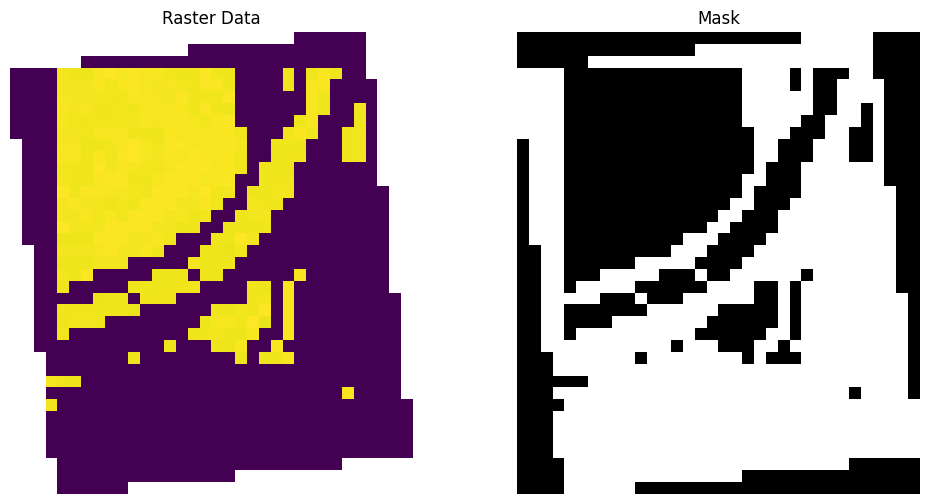

Mask saved to mask.tif


In [56]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Input and output file paths
input_raster = "Treemap data in lidar boundary/TPA_LIVE__Live_Trees_Per_Acre_25-02-17-19-50-13.tif" 
output_mask = "mask.tif"

# Open the raster file
with rasterio.open(input_raster) as src:
    raster_data = src.read(1)  # Read the first band
    
    # Create a mask where values equal -32768.0
    mask = (raster_data == -32768.0).astype(np.uint8)
    
    # Define metadata for the output mask
    mask_meta = src.meta.copy()
    mask_meta.update(dtype=rasterio.uint8, count=1, nodata=0)
    mask_meta.pop('nodata', None)  # Ensure nodata is removed if it's invalid
    
    # Write the mask to a new file
    with rasterio.open(output_mask, "w", **mask_meta) as dst:
        dst.write(mask, 1)

# Plot the raster and mask side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(raster_data, cmap='viridis', interpolation='nearest')
axes[0].set_title("Raster Data")
axes[0].axis("off")

axes[1].imshow(mask, cmap='gray', interpolation='nearest')
axes[1].set_title("Mask")
axes[1].axis("off")

plt.show()

print(f"Mask saved to {output_mask}")


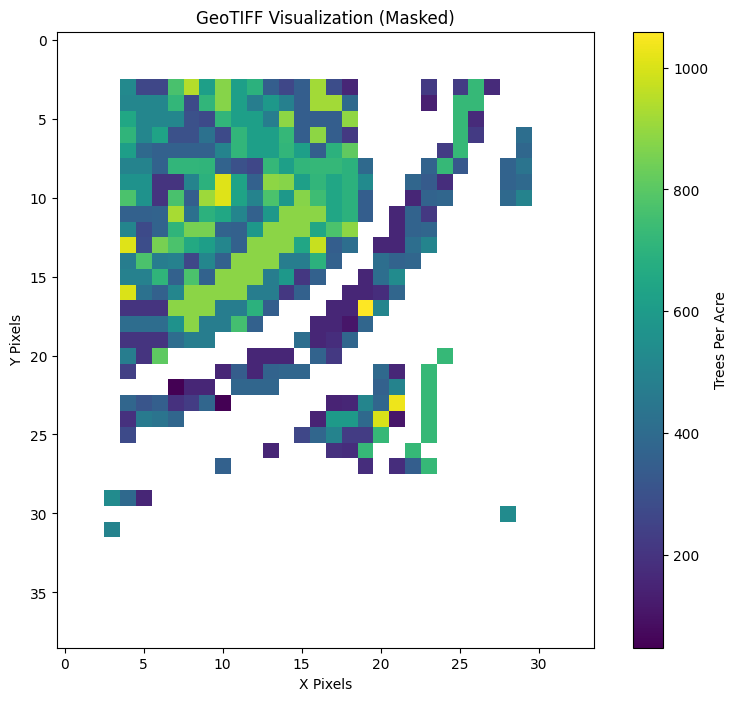

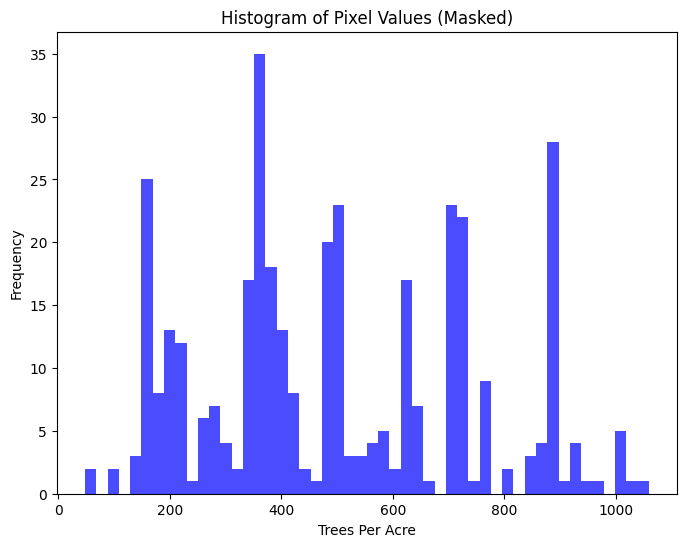

Masked GeoTIFF saved to masked_output.tif


In [60]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
geotiff_path = "/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/Treemap data in lidar boundary/TPA_LIVE__Live_Trees_Per_Acre_25-02-17-19-50-13.tif"
output_masked_path = "masked_output.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -32768.0
    data = src.read(1)  # Read the first band
    profile = src.profile
    
    # Mask the no-data values
    masked_data = np.ma.masked_equal(data, src.nodata)
    
    # Apply the mask by setting no-data pixels to np.nan for visualization
    masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())
    
    # Update metadata and write masked data to a new file (keeping nodata as zero)
    profile.update(dtype=rasterio.float32, nodata=0)
    with rasterio.open(output_masked_path, "w", **profile) as dst:
        dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

# Plot the masked image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar, ignoring NaN values
img = plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.colorbar(img, label='Trees Per Acre')
plt.title("GeoTIFF Visualization (Masked)")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of pixel values, explicitly excluding the no-data values
plt.figure(figsize=(8, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values (Masked)")
plt.xlabel("Trees Per Acre")
plt.ylabel("Frequency")
plt.show()

print(f"Masked GeoTIFF saved to {output_masked_path}")


## Resample Lidar to Treemap 30m grid

In [100]:
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import reproject, Resampling
import numpy as np

# Define the file paths
raster1_path = "masked_output.tif"  # The raster with a 30-meter grid
raster2_path = "Stand_density-1.tif"  # The raster with a different CRS and smaller spatial scale

# Open the first raster (the one with the 30-meter grid)
with rasterio.open(raster1_path) as src1:
    # Read the transform and CRS from raster1
    transform1 = src1.transform
    crs1 = src1.crs
    width1 = src1.width
    height1 = src1.height
    
    # Open the second raster (the one with the smaller spatial scale)
    with rasterio.open(raster2_path) as src2:
        # Check if the CRS is different
        if src2.crs != crs1:
            # Reproject raster2 to match the CRS of raster1
            resampled_data = np.empty((height1, width1), dtype=np.float32)
            reproject(
                source=rasterio.band(src2, 1),
                destination=resampled_data,
                src_transform=src2.transform,
                src_crs=src2.crs,
                dst_transform=transform1,
                dst_crs=crs1,
                resampling=Resampling.nearest
            )
        else:
            # If both rasters are in the same CRS, just resample raster2 to the 30-meter grid
            resampled_data = np.empty((height1, width1), dtype=np.float32)
            reproject(
                source=rasterio.band(src2, 1),
                destination=resampled_data,
                src_transform=src2.transform,
                src_crs=src2.crs,
                dst_transform=transform1,
                dst_crs=crs1,
                resampling=Resampling.nearest
            )
        
# Save the resampled raster
output_resampled_path = "resampled_raster.tif"
with rasterio.open(output_resampled_path, 'w', driver='GTiff', height=height1, width=width1,
                   count=1, dtype=resampled_data.dtype, crs=crs1, transform=transform1) as dst:
    dst.write(resampled_data, 1)

print(f"Resampled raster saved to {output_resampled_path}")


Resampled raster saved to resampled_raster.tif


## Visualize resampled lidar data

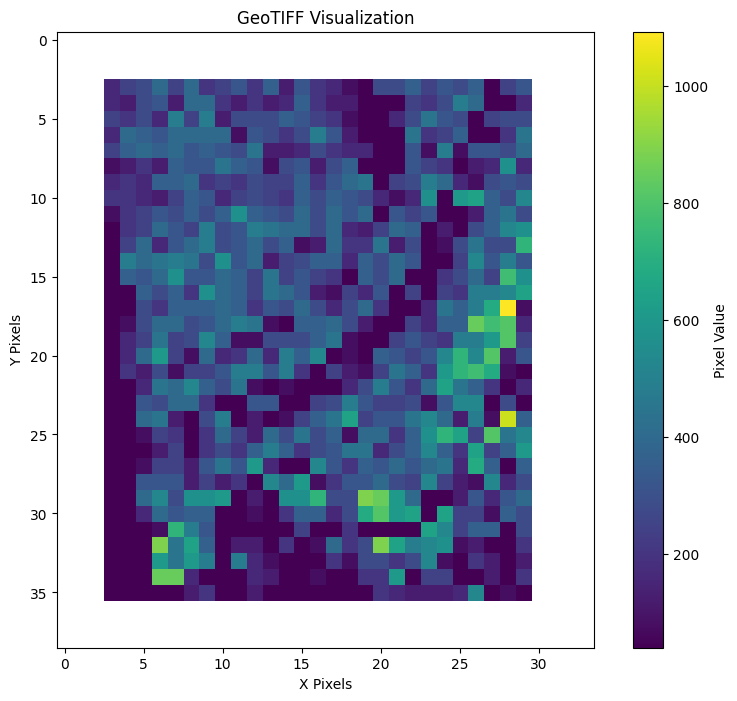

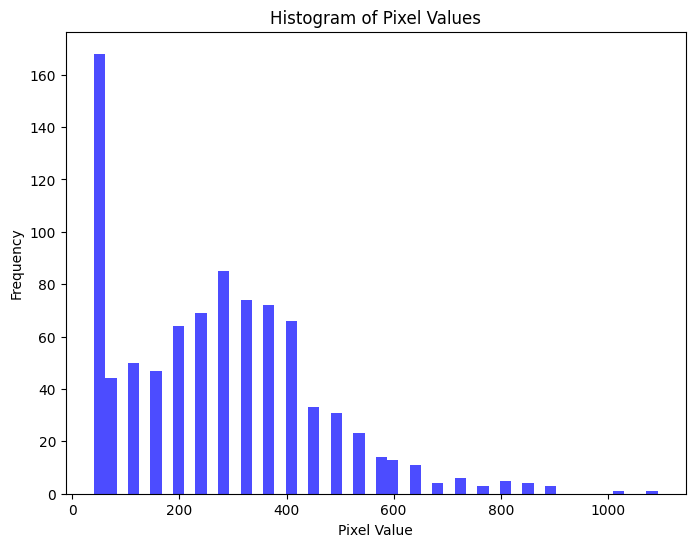

In [101]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
geotiff_path = "resampled_raster.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -99999
    data = src.read(1)  # Read the first band
    profile = src.profile
    # Mask the no-data values
    band = np.ma.masked_equal(data, src.nodata)

# Plot the image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar
img = plt.imshow(band, cmap=cmap)
plt.colorbar(img, label='Pixel Value')
plt.title("GeoTIFF Visualization")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of pixel values, excluding the no-data values
plt.figure(figsize=(8, 6))
plt.hist(band.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## Apply mask to resampled lidar

In [105]:
import rasterio
import numpy as np

# Define the file paths
mask_tif_path = "mask.tif"    # Mask raster
resampled_raster_path = "resampled_raster.tif"  # The resampled raster from Step 1

# Open the mask raster
with rasterio.open(mask_tif_path) as mask_src:
    mask_data = mask_src.read(1)  # Read the mask's first band
    
    # Open the resampled raster
    with rasterio.open(resampled_raster_path) as resampled_src:
        resampled_data = resampled_src.read(1)  # Read the resampled raster data
        
        # Ensure that the mask and resampled raster are aligned in terms of size and CRS
        if mask_src.crs != resampled_src.crs:
            raise ValueError("Mask CRS does not match the resampled raster's CRS.")
        
        # Apply the mask: set resampled raster values to NaN (or another nodata value) where mask is 1
        masked_data = np.where(mask_data == 1, np.nan, resampled_data)

# Save the masked result to a new GeoTIFF
output_masked_path = "masked_resampled_raster.tif"
with rasterio.open(output_masked_path, 'w', driver='GTiff', height=resampled_src.height, width=resampled_src.width,
                   count=1, dtype=masked_data.dtype, crs=resampled_src.crs, transform=resampled_src.transform, nodata=np.nan) as dst:
    dst.write(masked_data, 1)

print(f"Masked resampled raster saved to {output_masked_path}")


Masked resampled raster saved to masked_resampled_raster.tif


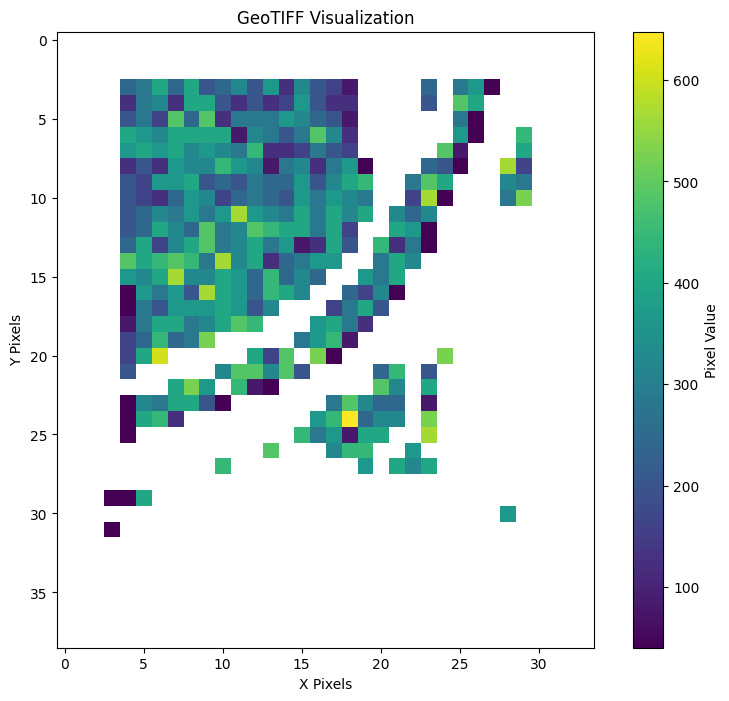

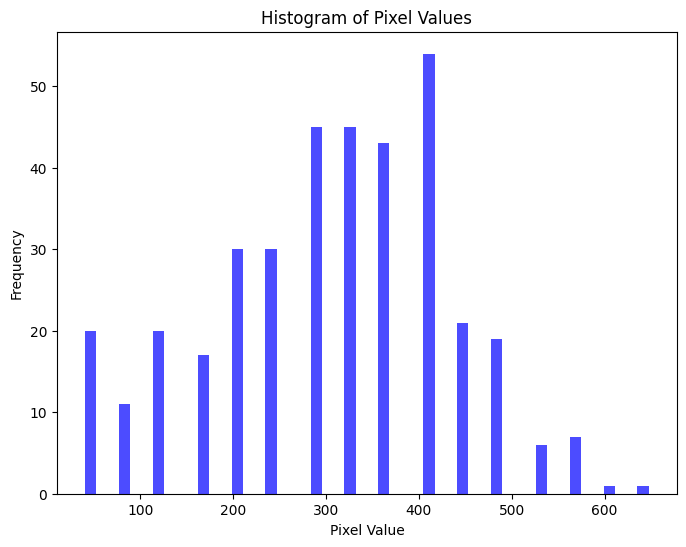

In [106]:
# Define the file path
geotiff_path = "masked_resampled_raster.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -99999
    data = src.read(1)  # Read the first band
    profile = src.profile
    # Mask the no-data values
    band = np.ma.masked_equal(data, src.nodata)

# Plot the image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar
img = plt.imshow(band, cmap=cmap)
plt.colorbar(img, label='Pixel Value')
plt.title("GeoTIFF Visualization")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of pixel values, excluding the no-data values
plt.figure(figsize=(8, 6))
plt.hist(band.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## tiff To dataframes

In [121]:
import rasterio
import pandas as pd
import numpy as np
from pyproj import Transformer

# Define the path to the resampled raster
resampled_raster_path = "masked_resampled_raster.tif"

# Open the resampled raster
with rasterio.open(resampled_raster_path) as src:
    # Read the resampled raster data (first band)
    resampled_data = src.read(1)
    
    # Get the raster's transformation (affine)
    transform = src.transform
    
    # Get the pixel coordinates (row, column indices)
    rows, cols = np.indices(resampled_data.shape)
    
    # Convert pixel coordinates to geographic coordinates (e.g., UTM)
    x_coords, y_coords = transform * (cols, rows)
    
    # Define the CRS of the raster (use the CRS from the raster itself)
    raster_crs = src.crs
    
    # Define the target CRS (WGS84 for lat/lon)
    target_crs = 'EPSG:4326'  # WGS84 (latitude, longitude)
    
    # Initialize the pyproj Transformer to convert the coordinates
    transformer = Transformer.from_crs(raster_crs, target_crs, always_xy=True)
    
    # Reproject the coordinates from the raster CRS to WGS84
    lon, lat = transformer.transform(x_coords.flatten(), y_coords.flatten())

    # Create a DataFrame with pixel values and their corresponding geographic coordinates
    df = pd.DataFrame({
        'pixel_value': resampled_data.flatten(),
        'latitude': lat,
        'longitude': lon
    })
    
    # Add the 'data_source' column with value 'lidar'
    df['data_source'] = 'lidar'
    
    # Optionally, remove rows where pixel values are NaN (masked)
    #df = df.dropna(subset=['pixel_value'])

# Show the DataFrame
print(df.head())

# You can also save the DataFrame to a CSV file if needed
df.to_csv("resampled_lidar_TPA_dataframe.csv", index=False)


   pixel_value   latitude  longitude data_source
0     -99999.0  37.796767 -85.763583       lidar
1     -99999.0  37.796738 -85.763242       lidar
2     -99999.0  37.796709 -85.762900       lidar
3     -99999.0  37.796681 -85.762558       lidar
4     -99999.0  37.796652 -85.762216       lidar


In [122]:
df.shape

(1326, 4)

In [123]:
import rasterio
import pandas as pd
import numpy as np
from pyproj import Transformer

# Define the path to the resampled raster
resampled_raster_path = "masked_output.tif"

# Open the resampled raster
with rasterio.open(resampled_raster_path) as src:
    # Read the resampled raster data (first band)
    resampled_data = src.read(1)
    
    # Get the raster's transformation (affine)
    transform = src.transform
    
    # Get the pixel coordinates (row, column indices)
    rows, cols = np.indices(resampled_data.shape)
    
    # Convert pixel coordinates to geographic coordinates (e.g., UTM)
    x_coords, y_coords = transform * (cols, rows)
    
    # Define the CRS of the raster (use the CRS from the raster itself)
    raster_crs = src.crs
    
    # Define the target CRS (WGS84 for lat/lon)
    target_crs = 'EPSG:4326'  # WGS84 (latitude, longitude)
    
    # Initialize the pyproj Transformer to convert the coordinates
    transformer = Transformer.from_crs(raster_crs, target_crs, always_xy=True)
    
    # Reproject the coordinates from the raster CRS to WGS84
    lon, lat = transformer.transform(x_coords.flatten(), y_coords.flatten())

    # Create a DataFrame with pixel values and their corresponding geographic coordinates
    df = pd.DataFrame({
        'pixel_value': resampled_data.flatten(),
        'latitude': lat,
        'longitude': lon
    })
    
    # Add the 'data_source' column with value 'lidar' or 'raster'
    df['data_source'] = 'raster'
    
    # Optionally, remove rows where pixel values are NaN (masked)
    #df = df.dropna(subset=['pixel_value'])

# Show the DataFrame
print(df.head())
# You can also save the DataFrame to a CSV file if needed
df.to_csv("resampled_treemap_TPA_dataframe.csv", index=False)

   pixel_value   latitude  longitude data_source
0          NaN  37.796767 -85.763583      raster
1          NaN  37.796738 -85.763242      raster
2          NaN  37.796709 -85.762900      raster
3          NaN  37.796681 -85.762558      raster
4          NaN  37.796652 -85.762216      raster


In [124]:
df.shape

(1326, 4)

In [127]:
import pandas as pd

# Load the two CSV files into DataFrames
df1 = pd.read_csv("resampled_treemap_TPA_dataframe.csv")  # Replace with the actual file path
df2 = pd.read_csv("resampled_lidar_TPA_dataframe.csv")  # Replace with the actual file path

# Merge the DataFrames on 'latitude' and 'longitude'
df = pd.merge(df1, df2, on=['latitude', 'longitude'], how='inner')  # You can adjust 'how' as needed

# Optionally, save the merged DataFrame to a new CSV file
df.to_csv("merged_dataframe.csv", index=False)
df


,pixel_value_x,latitude,longitude,data_source_x,pixel_value_y,data_source_y
0,NaN,37.796767,-85.763583,raster,-99999.0,lidar
1,NaN,37.796738,-85.763242,raster,-99999.0,lidar
2,NaN,37.796709,-85.762900,raster,-99999.0,lidar
3,NaN,37.796681,-85.762558,raster,-99999.0,lidar
4,NaN,37.796652,-85.762216,raster,-99999.0,lidar
...,...,...,...,...,...,...
1321,NaN,37.785820,-85.755073,raster,-99999.0,lidar
1322,NaN,37.785791,-85.754731,raster,-99999.0,lidar
1323,NaN,37.785762,-85.754389,raster,-99999.0,lidar
1324,NaN,37.785733,-85.754047,raster,-99999.0,lidar


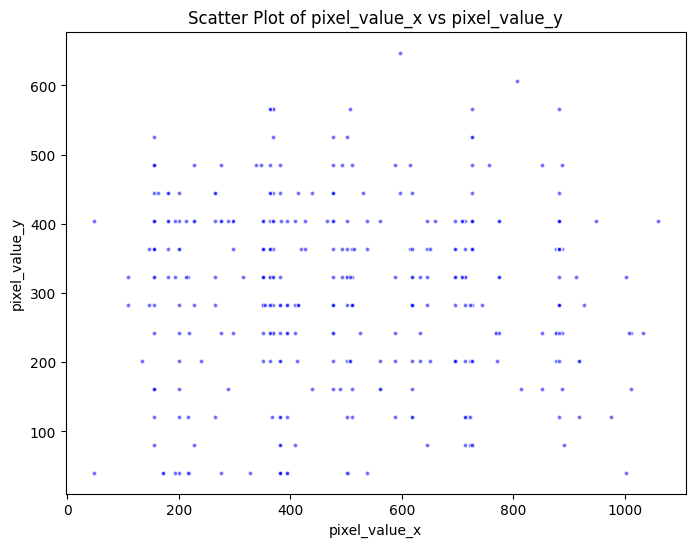

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is the DataFrame with 'pixel_value_x' and 'pixel_value_y' columns
# For example, let's create a sample DataFrame
# df = pd.read_csv("your_dataframe.csv")  # You would load your actual data

# Filter out NaN values and values equal to -99999.0
df_filtered = df[(df['pixel_value_x'].notna()) & 
                 (df['pixel_value_y'].notna()) & 
                 (df['pixel_value_x'] != -99999.0) &
                 (df['pixel_value_y'] != -99999.0)]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['pixel_value_x'], df_filtered['pixel_value_y'], alpha=0.6, color='blue', edgecolors='w', s=10)

# Add labels and title
plt.title("Scatter Plot of pixel_value_x vs pixel_value_y")
plt.xlabel("pixel_value_x")
plt.ylabel("pixel_value_y")

# Show the plot
plt.show()


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Assume df is the DataFrame with 'pixel_value_x' and 'pixel_value_y' columns
# For example, let's create a sample DataFrame
# df = pd.read_csv("your_dataframe.csv")  # You would load your actual data

# Filter out NaN values and values equal to -99999.0
df_filtered = df[(df['pixel_value_x'].notna()) & 
                 (df['pixel_value_y'].notna()) & 
                 (df['pixel_value_x'] != -99999.0) &
                 (df['pixel_value_y'] != -99999.0)]

# Prepare the data for linear regression
X = df_filtered['pixel_value_x'].values.reshape(-1, 1)  # Reshape for a single feature (x)
y = df_filtered['pixel_value_y'].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the trained model
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = model.score(X, y)  # R-squared
rmse = np.sqrt(mean_squared_error(y, y_pred))  # RMSE

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['pixel_value_x'], df_filtered['pixel_value_y'], alpha=0.6, color='blue', edgecolors='w', s=10)

# Plot the regression line
plt.plot(df_filtered['pixel_value_x'], y_pred, color='red', linewidth=2)

# Add labels, title, and metrics
plt.title(f"Scatter Plot of pixel_value_x vs pixel_value_y\n"
          f"R-squared = {r_squared:.2f}, RMSE = {rmse:.2f}")
plt.xlabel("pixel_value_x")
plt.ylabel("pixel_value_y")

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'sklearn'

# load the Canopy cover

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/gee_treemap'

In [3]:
os.chdir("/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/")

In [4]:
import rasterio
# file path
raster_fp = 'canopy_cover 1.tif'

# open file with rasterio
raster = rasterio.open(raster_fp)
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 100,
 'height': 100,
 'count': 1,
 'crs': CRS.from_wkt('COMPD_CS["NAD83(2011) / Conus Albers + NAVD88 height - Geoid12B (meters)",PROJCS["NAD83(2011) / Conus Albers",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6350"]],VERT_CS["NAVD88 height",VERT_DATUM["North American Vertical Datum 1988",2005,AUTHORITY["EPS

In [6]:
geotiff_path = "canopy_cover 1.tif"
# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -99999
    data = src.read(1)  # Read the first band
        # Mask the no-data values
    band = np.ma.masked_equal(data, src.nodata)
# Get value counts for the raster (excluding no-data values)
unique, counts = np.unique(band.compressed(), return_counts=True)
value_counts = dict(zip(unique, counts))

# Print the value counts
print("Value Counts for the Raster:")
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")

Value Counts for the Raster:
Value: 100.0, Count: 276
Value: 200.0, Count: 116
Value: 300.0, Count: 111
Value: 400.0, Count: 86
Value: 500.0, Count: 78
Value: 600.0, Count: 84
Value: 700.0, Count: 36
Value: 800.0, Count: 45
Value: 900.0, Count: 18
Value: 1000.0, Count: 39
Value: 1100.0, Count: 8
Value: 1200.0, Count: 55
Value: 1300.0, Count: 4
Value: 1400.0, Count: 35
Value: 1500.0, Count: 18
Value: 1600.0, Count: 41
Value: 1700.0, Count: 1
Value: 1800.0, Count: 24
Value: 2000.0, Count: 34
Value: 2100.0, Count: 38
Value: 2200.0, Count: 18
Value: 2400.0, Count: 65
Value: 2500.0, Count: 2
Value: 2600.0, Count: 3
Value: 2700.0, Count: 47
Value: 2800.0, Count: 35
Value: 3000.0, Count: 67
Value: 3200.0, Count: 42
Value: 3300.0, Count: 45
Value: 3500.0, Count: 16
Value: 3600.0, Count: 94
Value: 3900.0, Count: 13
Value: 4000.0, Count: 98
Value: 4200.0, Count: 23
Value: 4400.0, Count: 93
Value: 4500.0, Count: 67
Value: 4800.0, Count: 130
Value: 4900.0, Count: 5
Value: 5000.0, Count: 90
Value: 

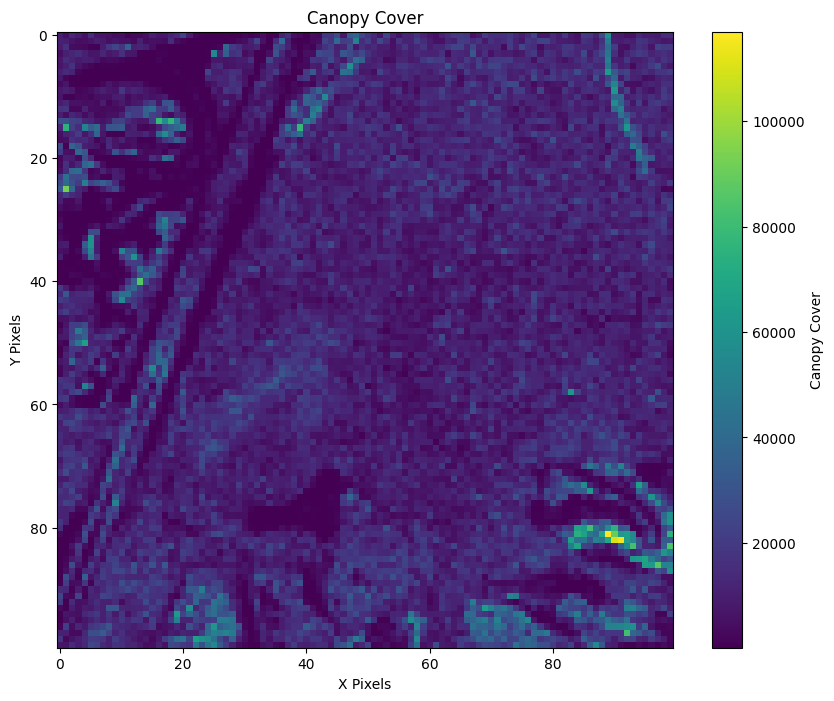

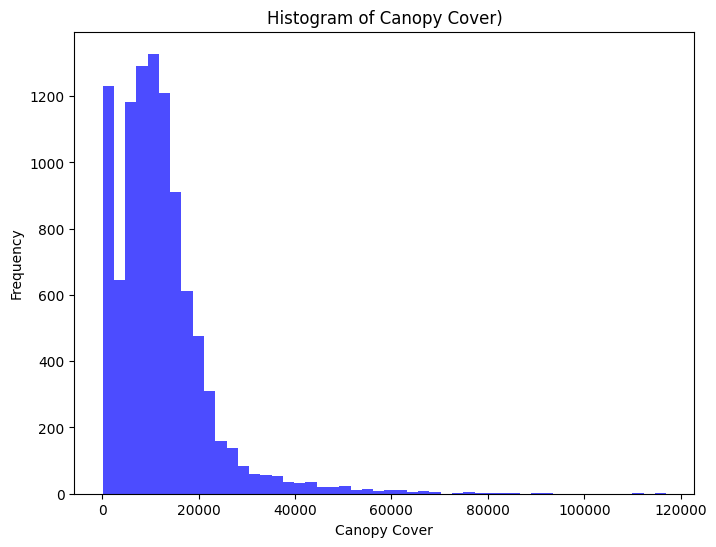

Masked GeoTIFF saved to masked_lidar_canopy_cover.tif


In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
geotiff_path ="canopy_cover 1.tif"
output_masked_path = "masked_lidar_canopy_cover.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -3.3999999521443642e+38
    data = src.read(1)  # Read the first band
    profile = src.profile
    
    # Mask the no-data values
    masked_data = np.ma.masked_equal(data, src.nodata)
    
    # Apply the mask by setting no-data pixels to np.nan for visualization
    masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())
    
    # Update metadata and write masked data to a new file (keeping nodata as zero)
    profile.update(dtype=rasterio.float32, nodata=0)
    with rasterio.open(output_masked_path, "w", **profile) as dst:
        dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

# Plot the masked image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar, ignoring NaN values
img = plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.colorbar(img, label='Canopy Cover')
plt.title("Canopy Cover")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of pixel values, explicitly excluding the no-data values
plt.figure(figsize=(8, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Canopy Cover)")
plt.xlabel("Canopy Cover")
plt.ylabel("Frequency")
plt.show()

print(f"Masked GeoTIFF saved to {output_masked_path}")


# get bounding box from lidar CC and overlay on treemap CC

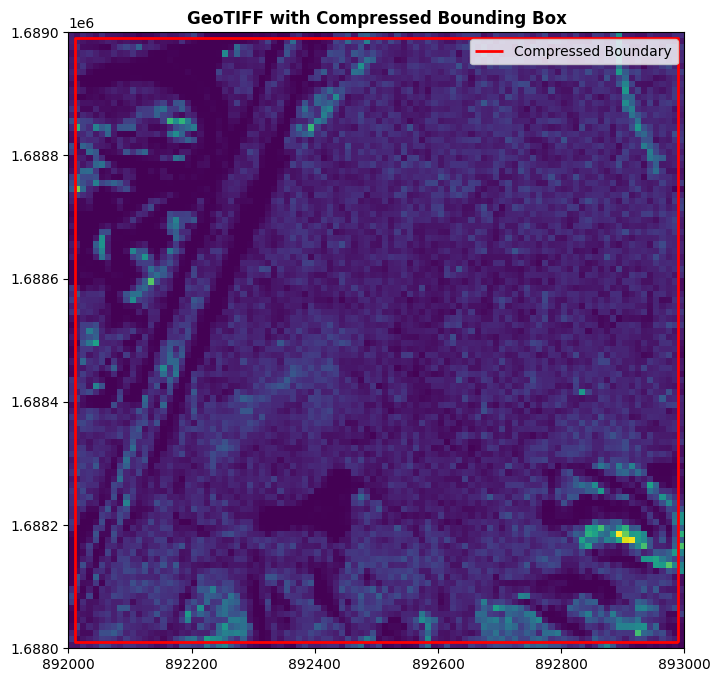

In [13]:
geotiff_path = "/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/canopy_cover 1.tif"
shapefile_path = "/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/cc_lidar_boundary_shapefile.shp"
geotiff_to_shapefile_and_plot(geotiff_path, shapefile_path)

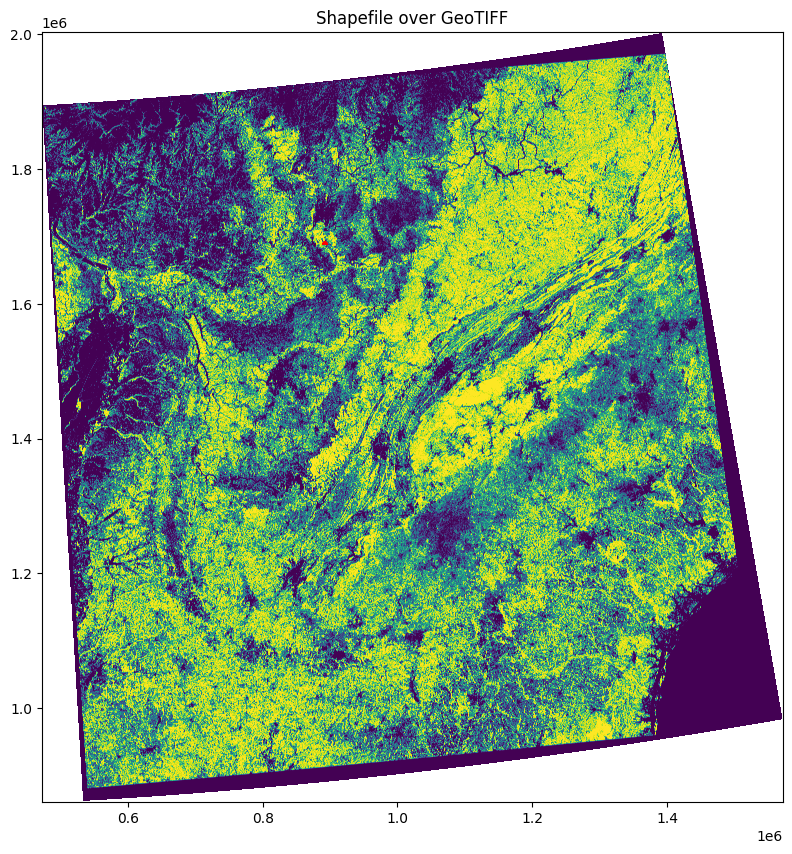

In [15]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths to your GeoTIFF and shapefile
tif_path = 'output-cc.tiff'
shapefile_path = 'cc_lidar_boundary_shapefile.shp'

# Open the GeoTIFF
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, ax=ax)

    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Ensure CRS match
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

    # Plot the shapefile
    gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=4)

    # Add labels and title
    plt.title('Shapefile over GeoTIFF')
    plt.show()


# Extract the Canopy Cover with the shapefile

In [27]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import json
import os

# Paths to input and output files
tif_path = 'output-cc.tiff'
shapefile_path = 'cc_lidar_boundary_shapefile.shp'
output_tif_path = 'clipped_treemap_output-cc.tif'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Ensure the shapefile's CRS matches the raster's CRS
with rasterio.open(tif_path) as src:
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

# Convert shapefile geometry to GeoJSON format (for rasterio.mask)
shapes = [json.loads(gdf.geometry.to_json())['features'][0]['geometry']]

# Clip the raster using the shapefile polygon
with rasterio.open(tif_path) as src:
    out_image, out_transform = mask(src, shapes, crop=True)
    
    # Update metadata for the clipped raster
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

    # Save the clipped raster to a new file
    with rasterio.open(output_tif_path, "w", **out_meta) as dest:
        dest.write(out_image)

print(f"Clipped raster saved to {output_tif_path}")


Clipped raster saved to clipped_treemap_output-cc.tif


In [19]:
geotiff_path = "clipped_output-cc.tif"
# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -99999
    data = src.read(1)  # Read the first band
        # Mask the no-data values
    band = np.ma.masked_equal(data, src.nodata)
# Get value counts for the raster (excluding no-data values)
unique, counts = np.unique(band.compressed(), return_counts=True)
value_counts = dict(zip(unique, counts))

# Print the value counts
print("Value Counts for the Raster:")
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")

Value Counts for the Raster:
Value: -32768.0, Count: 464
Value: 46.0, Count: 3
Value: 58.0, Count: 7
Value: 59.0, Count: 10
Value: 60.0, Count: 6
Value: 63.0, Count: 6
Value: 64.0, Count: 1
Value: 66.0, Count: 14
Value: 67.0, Count: 6
Value: 69.0, Count: 4
Value: 70.0, Count: 47
Value: 71.0, Count: 77
Value: 72.0, Count: 2
Value: 73.0, Count: 377
Value: 75.0, Count: 14
Value: 77.0, Count: 2
Value: 78.0, Count: 2
Value: 79.0, Count: 1
Value: 80.0, Count: 44
Value: 85.0, Count: 2


In [21]:
# open file with rasterio
raster = rasterio.open('clipped_output-cc.tif')
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -32768.0,
 'width': 33,
 'height': 34,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(30.0, 0.0, 892005.0,
        0.0, -30.0, 1689015.0)}

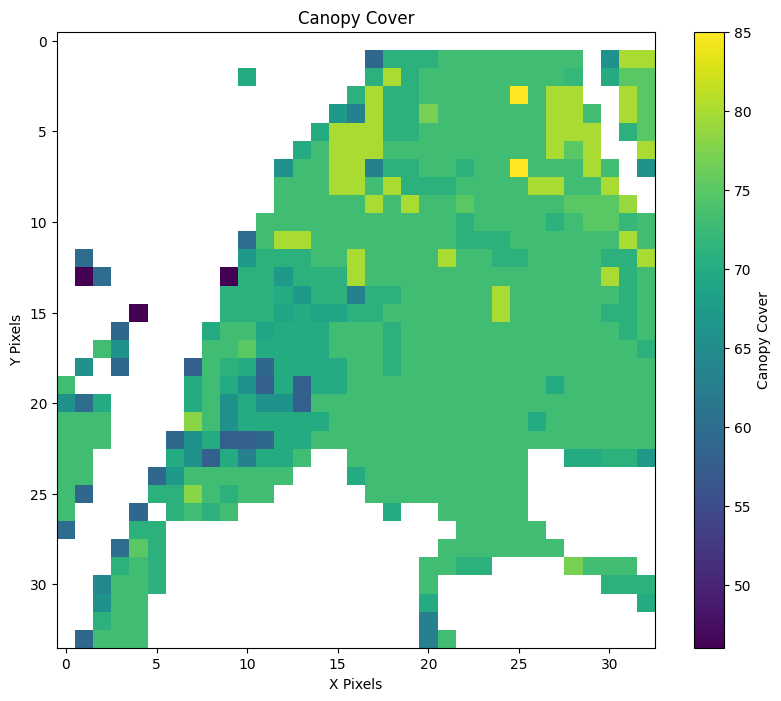

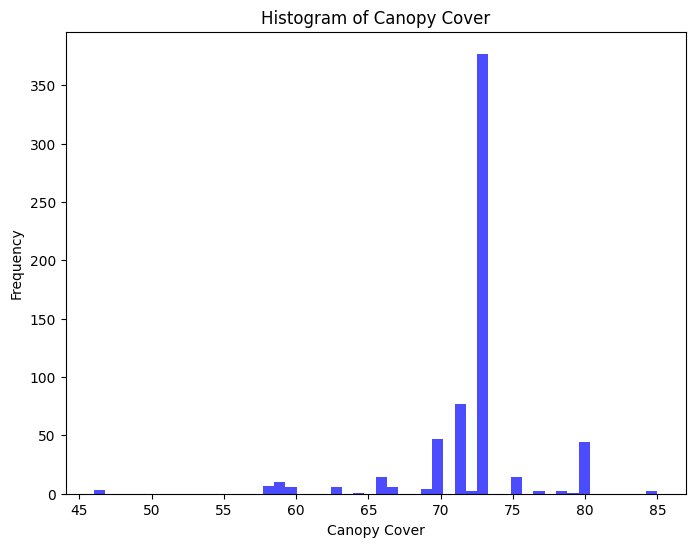

Masked GeoTIFF saved to masked_treemap_canopy_cover.tif


In [24]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
geotiff_path = "clipped_output-cc.tif"
output_masked_path = "masked_treemap_canopy_cover.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -32768.0
    data = src.read(1)  # Read the first band
    profile = src.profile

    # Mask no-data values and negative values
    masked_data = np.ma.masked_where((data == src.nodata) | (data < 0), data)

    # Prepare array for visualization (NaN for no-data and negative values)
    masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())

    # Update metadata and write masked data to a new file (keeping nodata as zero)
    profile.update(dtype=rasterio.float32, nodata=0)
    with rasterio.open(output_masked_path, "w", **profile) as dst:
        dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

# Plot the masked image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar, ignoring NaN values
img = plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.colorbar(img, label='Canopy Cover')
plt.title("Canopy Cover")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of valid pixel values (excluding no-data and negatives)
plt.figure(figsize=(8, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Canopy Cover")
plt.xlabel("Canopy Cover")
plt.ylabel("Frequency")
plt.show()

print(f"Masked GeoTIFF saved to {output_masked_path}")


# Plot treemap and lidar CC together

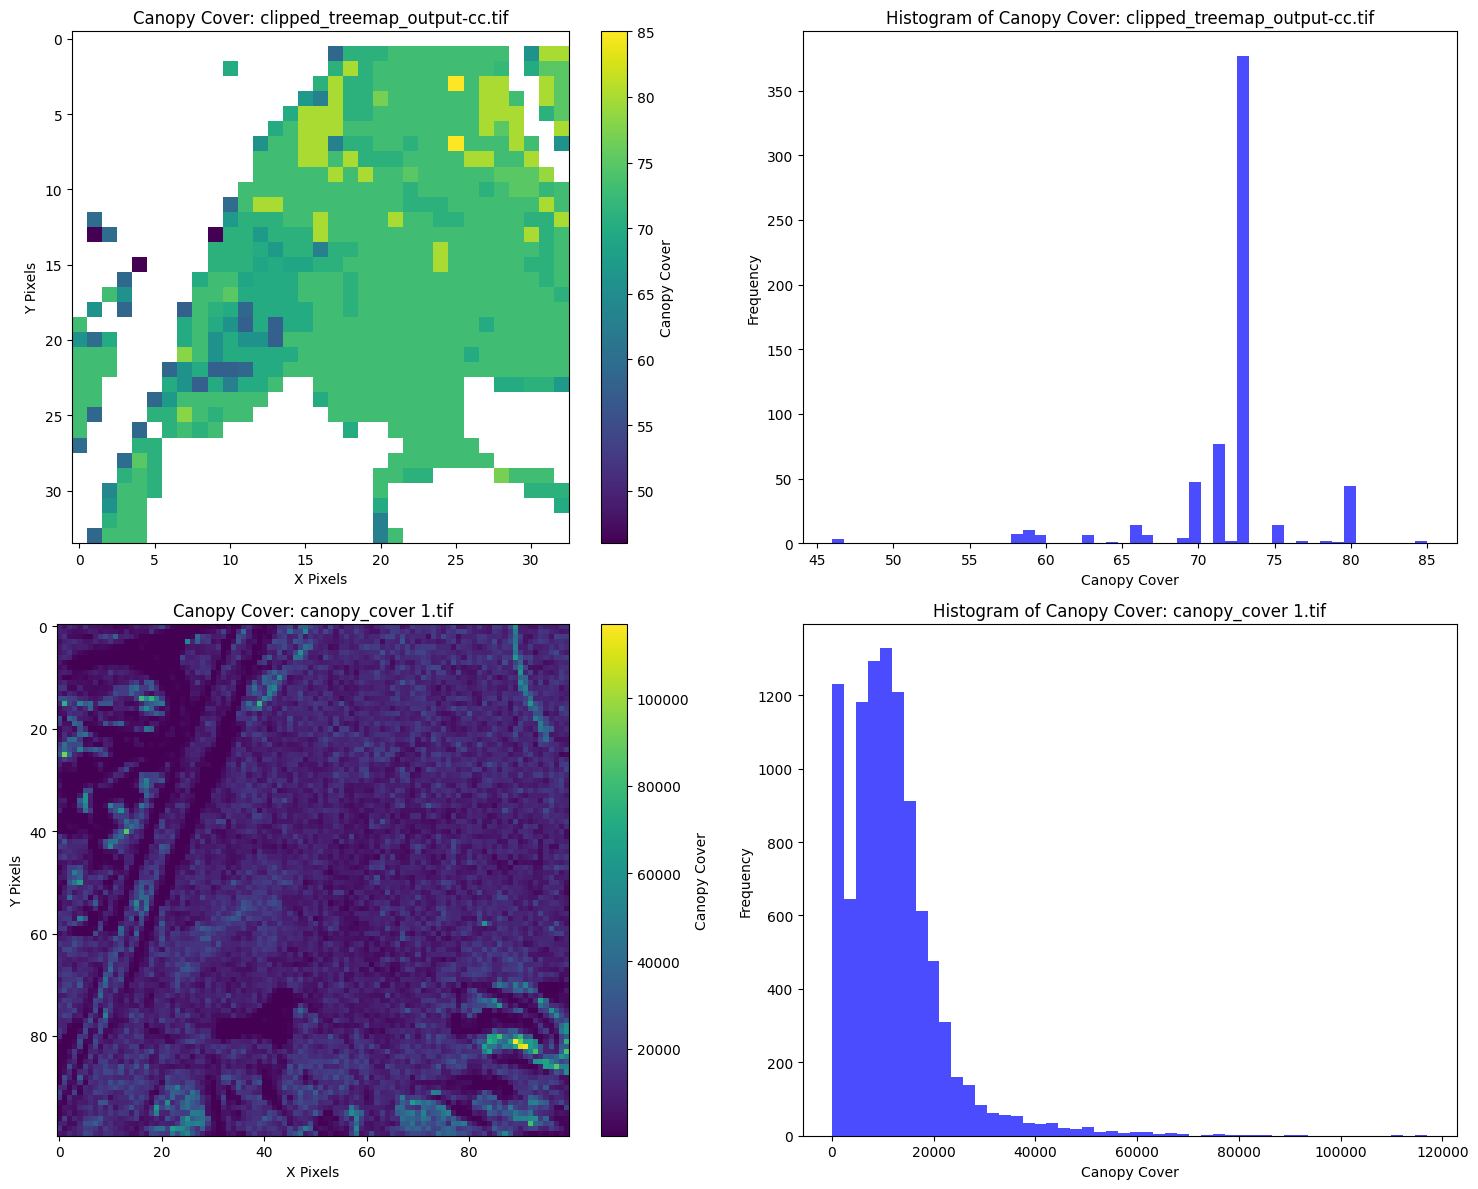

Masked GeoTIFFs saved:
- masked_treemap_canopy_cover.tif
- masked_lidar_canopy_cover.tif


In [29]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
geotiff_paths = [
    ("clipped_treemap_output-cc.tif", -32768.0, "masked_treemap_canopy_cover.tif"),
    ("canopy_cover 1.tif", -3.3999999521443642e+38, "masked_lidar_canopy_cover.tif")
]

# Set up plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, (geotiff_path, nodata_value, output_masked_path) in enumerate(geotiff_paths):
    with rasterio.open(geotiff_path, 'r+') as src:
        # Set the no-data value in the metadata
        src.nodata = nodata_value
        data = src.read(1)
        profile = src.profile

        # Mask no-data values and negative values
        masked_data = np.ma.masked_where((data == src.nodata) | (data < 0), data)

        # Prepare array for visualization (NaN for no-data and negative values)
        masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())

        # Update metadata and write masked data to a new file (keeping nodata as zero)
        profile.update(dtype=rasterio.float32, nodata=0)
        with rasterio.open(output_masked_path, "w", **profile) as dst:
            dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

        # Plot masked image
        cmap = plt.cm.viridis
        img = axes[i, 0].imshow(masked_array, cmap=cmap, interpolation='nearest')
        plt.colorbar(img, ax=axes[i, 0], label='Canopy Cover')
        axes[i, 0].set_title(f"Canopy Cover: {geotiff_path}")
        axes[i, 0].set_xlabel("X Pixels")
        axes[i, 0].set_ylabel("Y Pixels")

        # Plot histogram of valid pixel values
        axes[i, 1].hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
        axes[i, 1].set_title(f"Histogram of Canopy Cover: {geotiff_path}")
        axes[i, 1].set_xlabel("Canopy Cover")
        axes[i, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Masked GeoTIFFs saved:")
for _, _, output_masked_path in geotiff_paths:
    print(f"- {output_masked_path}")


## Rescaled lidar to range from 0-100


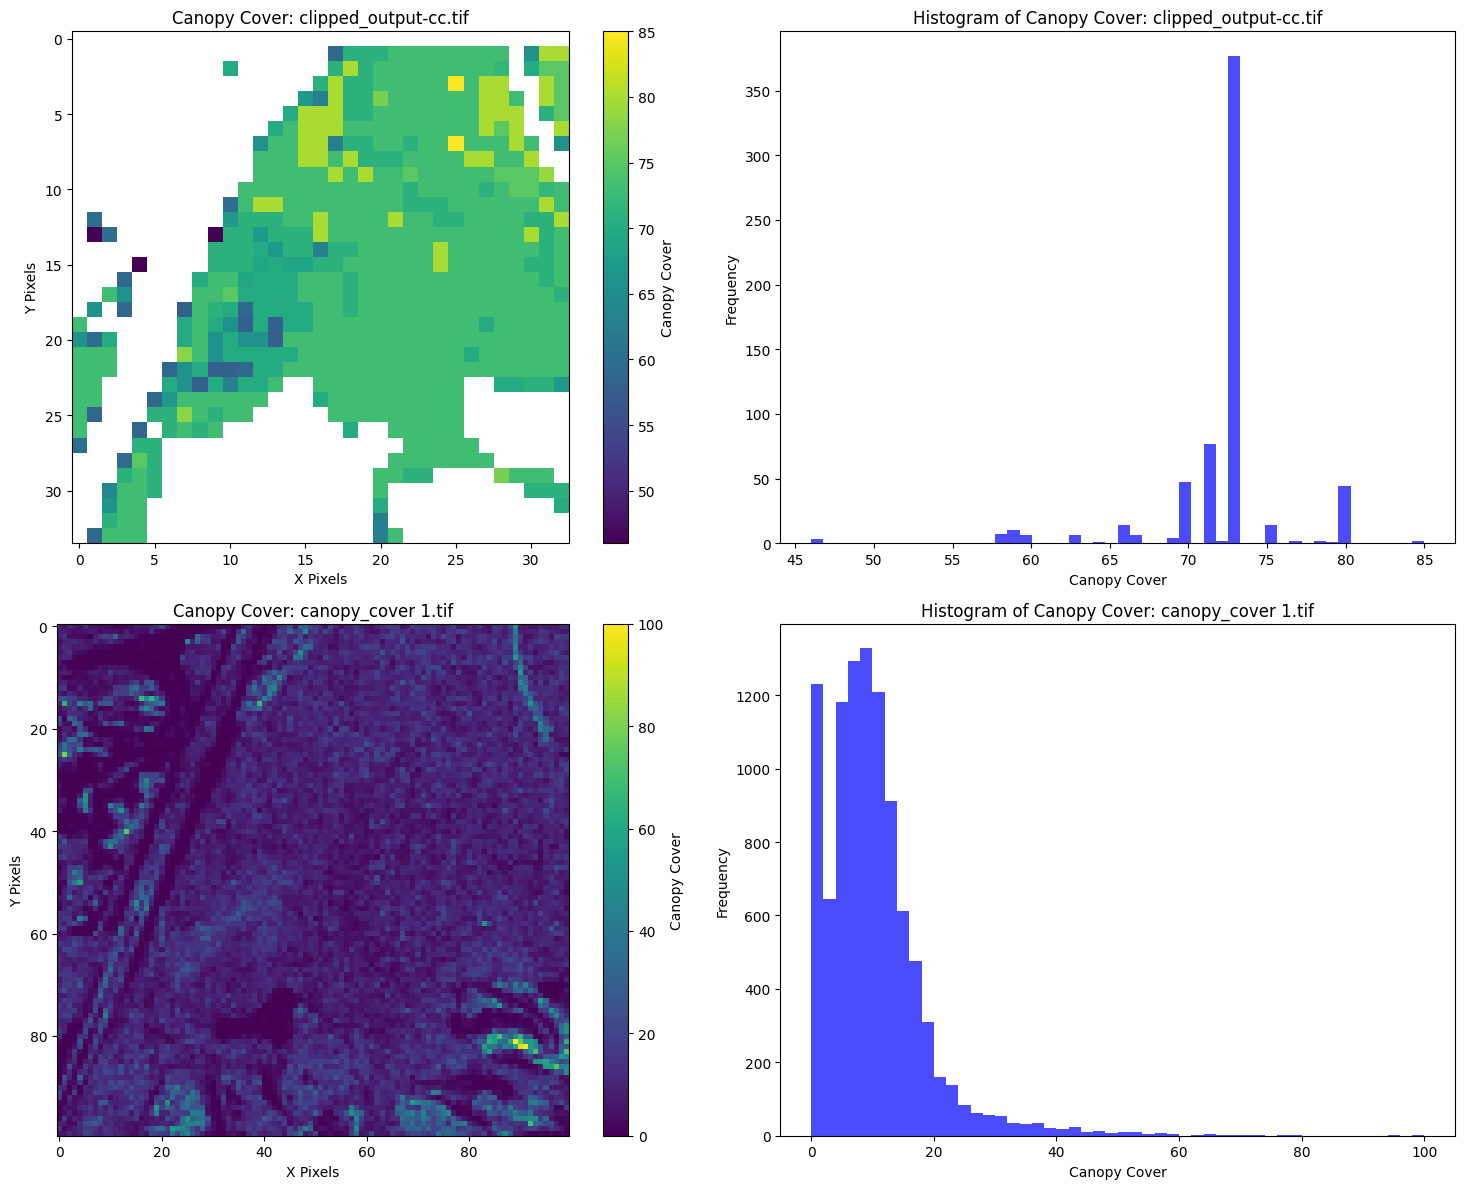

Masked GeoTIFFs saved:
- masked_treemap_canopy_cover.tif
- masked_lidar_canopy_cover.tif


In [30]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
geotiff_paths = [
    ("clipped_output-cc.tif", -32768.0, "masked_treemap_canopy_cover.tif"),
    ("canopy_cover 1.tif", -3.3999999521443642e+38, "masked_lidar_canopy_cover.tif")
]

# Set up plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, (geotiff_path, nodata_value, output_masked_path) in enumerate(geotiff_paths):
    with rasterio.open(geotiff_path, 'r+') as src:
        # Set the no-data value in the metadata
        src.nodata = nodata_value
        data = src.read(1)
        profile = src.profile

        # Mask no-data values and negative values
        masked_data = np.ma.masked_where((data == src.nodata) | (data < 0), data)

        # Rescale pixel values to 0-100 for the second image
        if "canopy_cover 1.tif" in geotiff_path:
            valid_data = masked_data.compressed()
            min_val, max_val = valid_data.min(), valid_data.max()
            rescaled_data = (masked_data - min_val) / (max_val - min_val) * 100
            masked_data = np.ma.masked_where(masked_data.mask, rescaled_data)

        # Prepare array for visualization (NaN for no-data and negative values)
        masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())

        # Update metadata and write masked data to a new file (keeping nodata as zero)
        profile.update(dtype=rasterio.float32, nodata=0)
        with rasterio.open(output_masked_path, "w", **profile) as dst:
            dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

        # Plot masked image
        cmap = plt.cm.viridis
        img = axes[i, 0].imshow(masked_array, cmap=cmap, interpolation='nearest')
        plt.colorbar(img, ax=axes[i, 0], label='Canopy Cover')
        axes[i, 0].set_title(f"Canopy Cover: {geotiff_path}")
        axes[i, 0].set_xlabel("X Pixels")
        axes[i, 0].set_ylabel("Y Pixels")

        # Plot histogram of valid pixel values
        axes[i, 1].hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
        axes[i, 1].set_title(f"Histogram of Canopy Cover: {geotiff_path}")
        axes[i, 1].set_xlabel("Canopy Cover")
        axes[i, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Masked GeoTIFFs saved:")
for _, _, output_masked_path in geotiff_paths:
    print(f"- {output_masked_path}")


## rescaled and masked the lidar data

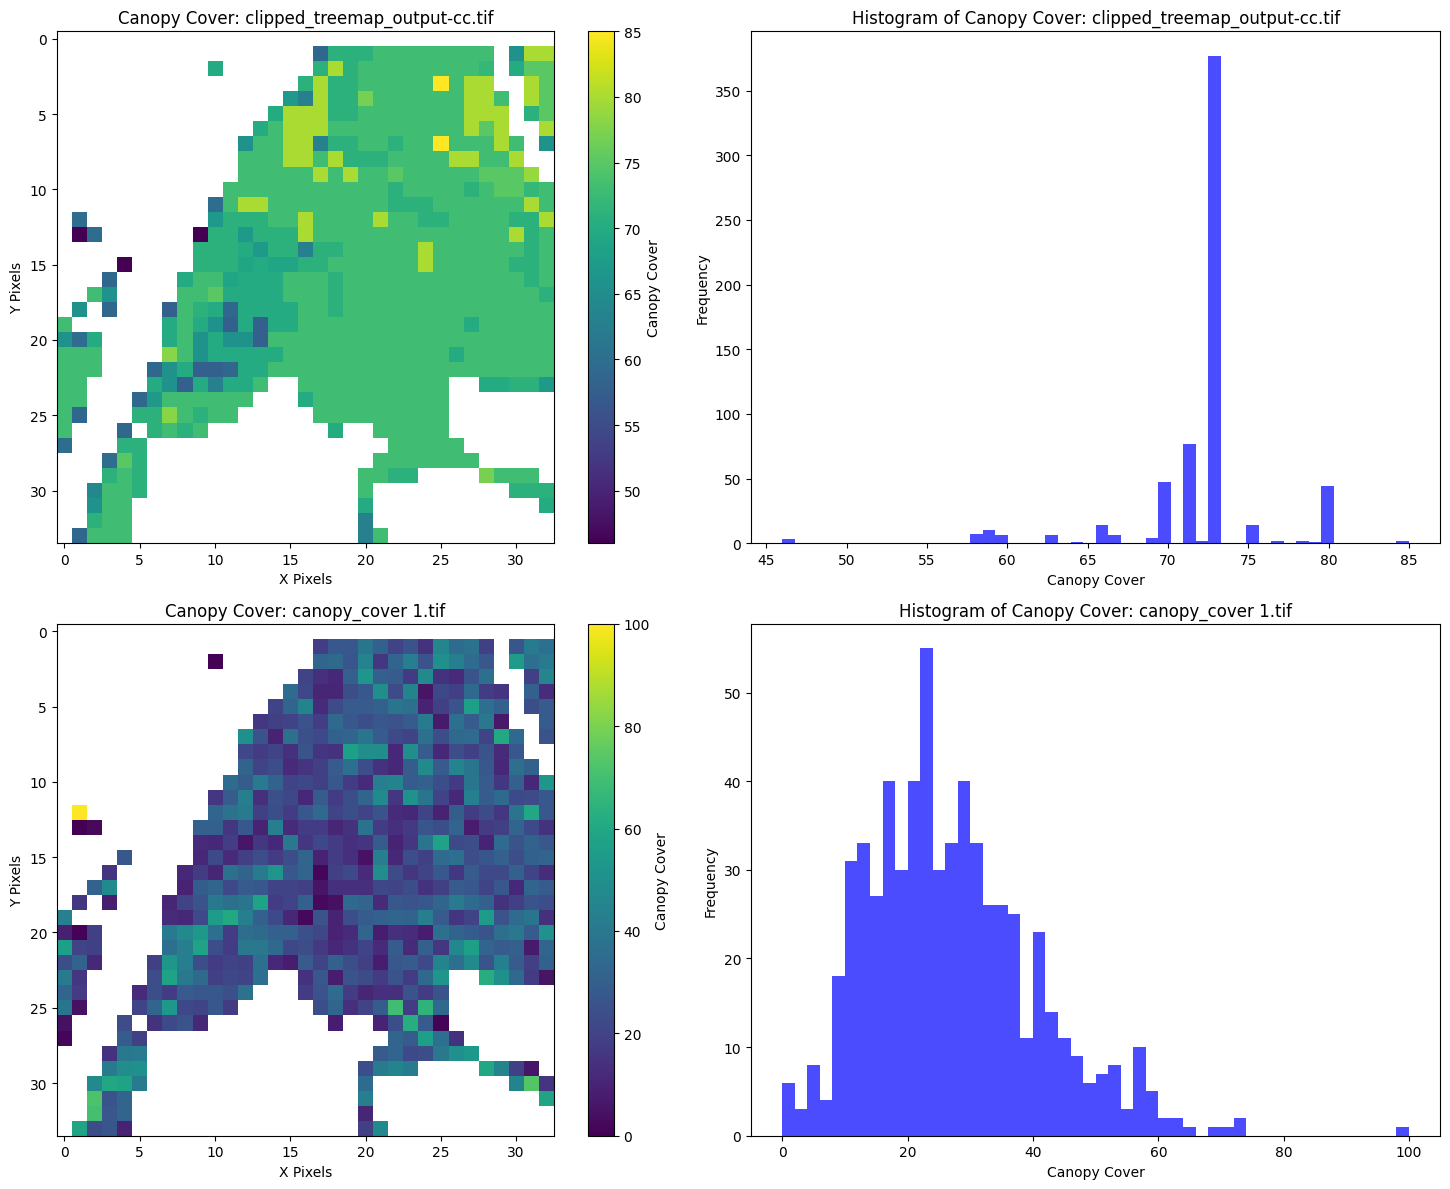

Masked GeoTIFFs saved:
- masked_treemap_canopy_cover.tif
- masked_lidar_canopy_cover.tif


In [32]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Define file paths
geotiff_paths = [
    ("clipped_treemap_output-cc.tif", -32768.0, "masked_treemap_canopy_cover.tif"),
    ("canopy_cover 1.tif", -3.3999999521443642e+38, "masked_lidar_canopy_cover.tif")
]

# Set up plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Load and process the first GeoTIFF to get the mask
with rasterio.open(geotiff_paths[0][0], 'r+') as src:
    data1 = src.read(1)
    nodata1 = geotiff_paths[0][1]
    mask1 = np.ma.masked_where((data1 == nodata1) | (data1 < 0), data1)

# Process each GeoTIFF
for i, (geotiff_path, nodata_value, output_masked_path) in enumerate(geotiff_paths):
    with rasterio.open(geotiff_path, 'r+') as src:
        data = src.read(1)
        profile = src.profile

        # Mask the no-data values
        masked_data = np.ma.masked_where((data == src.nodata) | (data < 0), data)

        if i == 1:  # If it's the second GeoTIFF, mask using the first one
            # Resample the second image to match the first GeoTIFF's resolution and extent
            with rasterio.open(geotiff_paths[0][0]) as src1:
                # Calculate the transformation for resampling
                transform, width, height = calculate_default_transform(
                    src.crs, src1.crs, src1.width, src1.height, *src1.bounds
                )

                # Create a new profile for the resampled data
                resampled_profile = src1.profile
                resampled_profile.update({
                    'height': height,
                    'width': width,
                    'transform': transform
                })

                # Read and reproject the data from the second GeoTIFF
                resampled_data = np.empty((height, width), dtype=np.float32)
                reproject(
                    source=rasterio.band(src, 1),
                    destination=resampled_data,
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=src1.crs,
                    resampling=Resampling.nearest
                )

                # Mask the resampled data using the mask from the first GeoTIFF
                resampled_masked_data = np.ma.masked_where(mask1.mask, resampled_data)

                # Scale the values of the second GeoTIFF to the range 0-100
                min_val = resampled_masked_data.min()
                max_val = resampled_masked_data.max()
                scaled_data = 100 * (resampled_masked_data - min_val) / (max_val - min_val)
                # Ensure no negative values after scaling
                scaled_data = np.ma.masked_where(resampled_masked_data.mask, scaled_data)

            # Update masked_data to the scaled data for the second GeoTIFF
            masked_data = scaled_data

        # Prepare array for visualization (NaN for no-data and negative values)
        masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())

        # Update metadata and write masked data to a new file (keeping nodata as zero)
        profile.update(dtype=rasterio.float32, nodata=0)
        with rasterio.open(output_masked_path, "w", **profile) as dst:
            # For the second image, write the scaled data
            if i == 1:
                dst.write(np.where(scaled_data.mask, 0, scaled_data.filled()).astype(rasterio.float32), 1)
            else:
                dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

        # Plot masked image
        cmap = plt.cm.viridis
        img = axes[i, 0].imshow(masked_array, cmap=cmap, interpolation='nearest')
        plt.colorbar(img, ax=axes[i, 0], label='Canopy Cover')
        axes[i, 0].set_title(f"Canopy Cover: {geotiff_path}")
        axes[i, 0].set_xlabel("X Pixels")
        axes[i, 0].set_ylabel("Y Pixels")

        # Plot histogram of valid pixel values
        axes[i, 1].hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
        axes[i, 1].set_title(f"Histogram of Canopy Cover: {geotiff_path}")
        axes[i, 1].set_xlabel("Canopy Cover")
        axes[i, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Masked GeoTIFFs saved:")
for _, _, output_masked_path in geotiff_paths:
    print(f"- {output_masked_path}")


In [7]:
pip install jenkspy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jenkspy import jenks_breaks

# Define the file path
geotiff_path = "output-cc.tiff"

# Open the GeoTIFF file
with rasterio.open(geotiff_path) as src:
    # Read no-data value and raster data
    nodata = src.nodata if src.nodata is not None else -32768.0
    data = src.read(1)
    transform = src.transform

    # Mask no-data values
    masked_data = np.ma.masked_equal(data, nodata)
    valid_data = masked_data.compressed()
    valid_data = valid_data[np.isfinite(valid_data)]

    # Create DataFrame with pixel values and coordinates
    rows, cols = np.where(~masked_data.mask)
    lons, lats = rasterio.transform.xy(transform, rows, cols)
    df = pd.DataFrame({
        'Pixel Value': masked_data[rows, cols].filled(np.nan),
        'Latitude': lats,
        'Longitude': lons
    })

    # Calculate Jenks breaks and classify
    n_classes = 5
    breaks = jenks_breaks(df['Pixel Value'].dropna().values, n_classes=n_classes)
    df['Jenks Class'] = np.digitize(df['Pixel Value'], bins=breaks, right=True)
    print(f"Jenks breaks: {breaks}")
    print(df.head())

# Plot histogram with Jenks breaks
plt.figure(figsize=(8, 6))
plt.hist(df['Pixel Value'].dropna(), bins=50, color='blue', alpha=0.7)
for br in breaks:
    plt.axvline(x=br, color='red', linestyle='--')
plt.title("Histogram of Canopy Cover with Jenks Breaks")
plt.xlabel("Canopy Cover")
plt.ylabel("Frequency")
plt.show()


# Tree Heights

In [2]:
import os
os.listdir()
os.chdir("/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/")

In [3]:
import rasterio

# Open the raster file
with rasterio.open('evh_clipped_Kentucky.tif') as src:
    print('Data type:', src.dtypes[0])
    print('NoData value:', src.nodatavals[0])


Data type: int16
NoData value: None


In [5]:
# Define the file path
geotiff_path = "evh_clipped_Kentucky.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path) as src:
    data = src.read(1)  # Read the first band
    profile = src.profile

# Get value counts for the raster (excluding no-data values)
unique, counts = np.unique(data, return_counts=True)
value_counts = dict(zip(unique, counts))

# Print the value counts
print("Value Counts for the Raster:")
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")

Value Counts for the Raster:
Value: 0, Count: 281350881


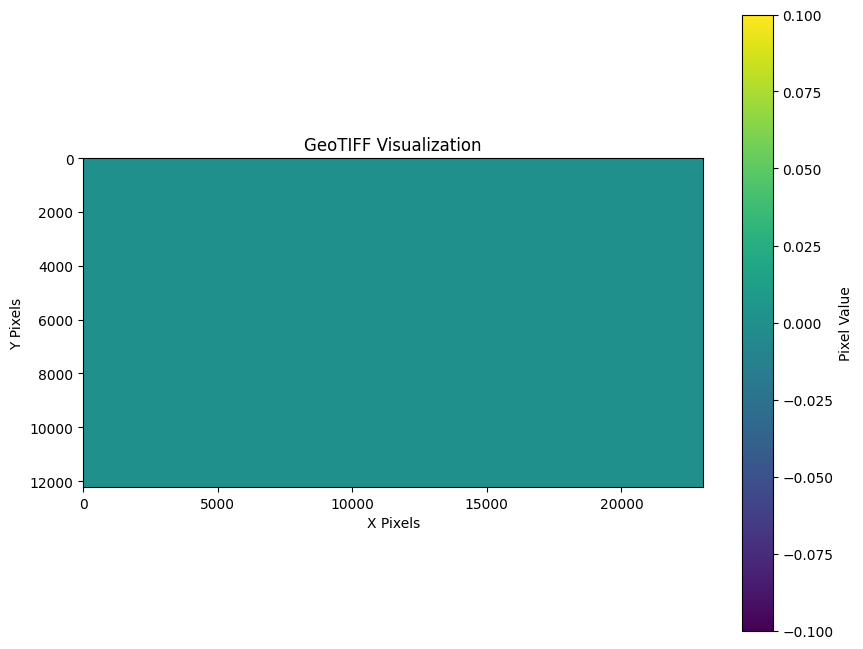

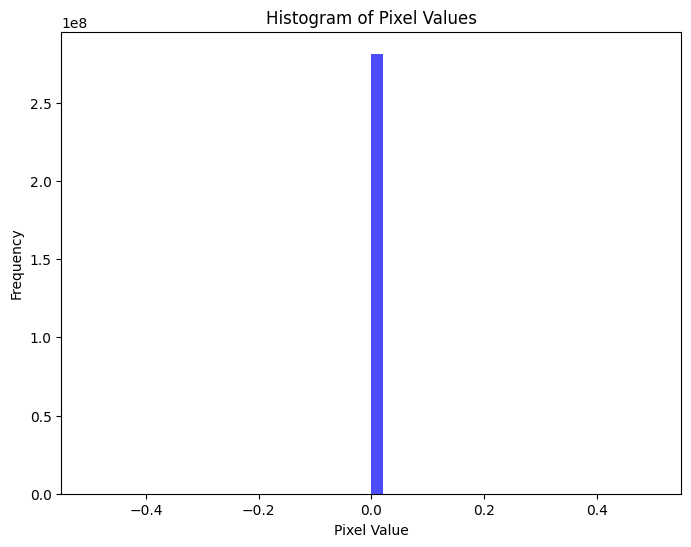

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
geotiff_path = "evh_clipped_Kentucky.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path) as src:
    data = src.read(1)  # Read the first band
    profile = src.profile

# Plot the image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar
img = plt.imshow(data, cmap=cmap)
plt.colorbar(img, label='Pixel Value')
plt.title("GeoTIFF Visualization")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of pixel values
plt.figure(figsize=(8, 6))
plt.hist(data.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


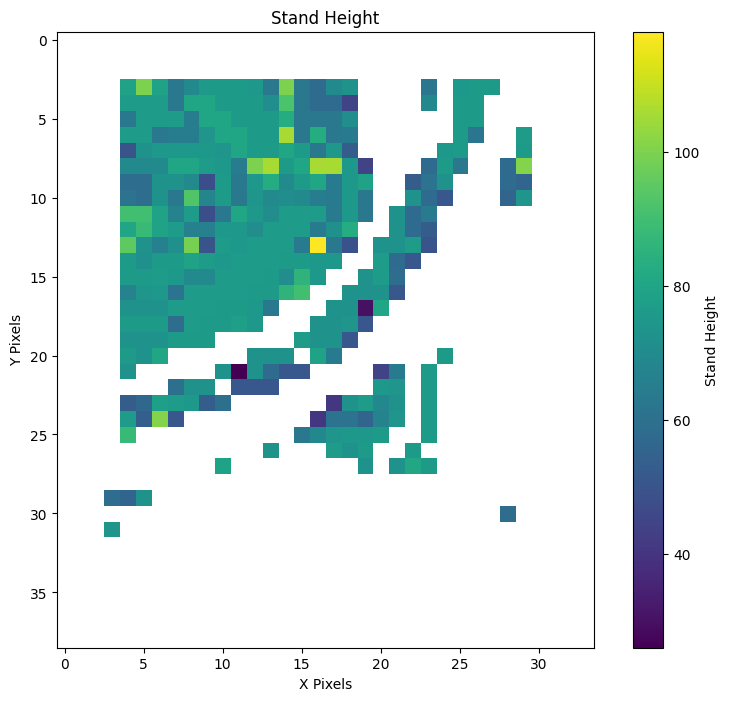

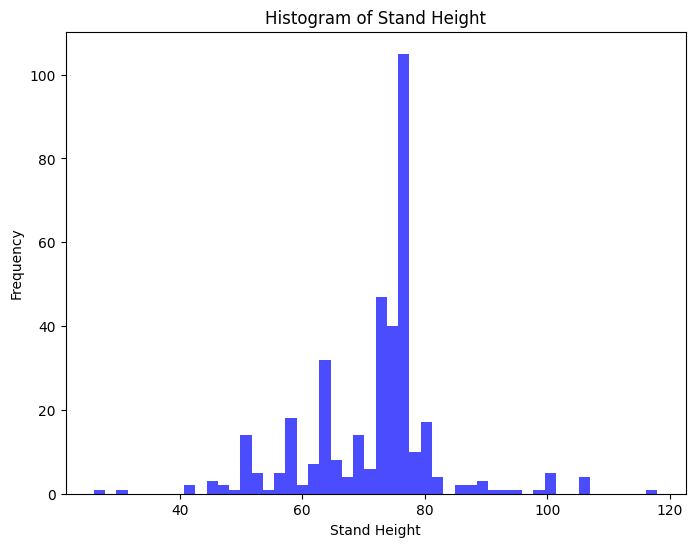

Masked GeoTIFF saved to masked_treemap_tree_height.tif


In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
geotiff_path = "Treemap data in lidar boundary/STANDHT__Height_of_Dominant_Trees__ft__25-02-17-19-50-13.tif"
output_masked_path = "masked_treemap_tree_height.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -32768.0
    data = src.read(1)  # Read the first band
    profile = src.profile

    # Mask no-data values and negative values
    masked_data = np.ma.masked_where((data == src.nodata) | (data < 0), data)

    # Prepare array for visualization (NaN for no-data and negative values)
    masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())

    # Update metadata and write masked data to a new file (keeping nodata as zero)
    profile.update(dtype=rasterio.float32, nodata=0)
    with rasterio.open(output_masked_path, "w", **profile) as dst:
        dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

# Plot the masked image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar, ignoring NaN values
img = plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.colorbar(img, label='Stand Height')
plt.title("Stand Height")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of valid pixel values (excluding no-data and negatives)
plt.figure(figsize=(8, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Stand Height")
plt.xlabel("Stand Height")
plt.ylabel("Frequency")
plt.show()

print(f"Masked GeoTIFF saved to {output_masked_path}")


# Get Shapefile from Lidar tree height

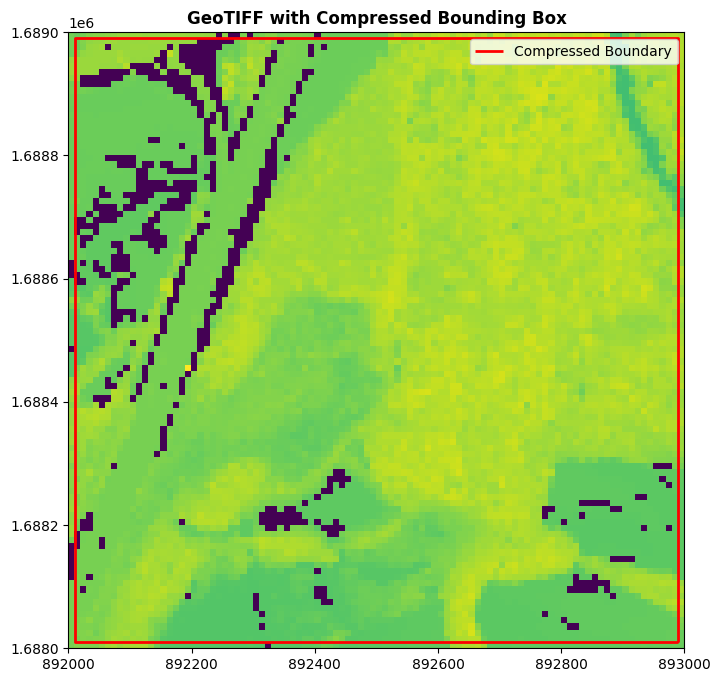

In [9]:
import rasterio
from rasterio.plot import show
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

def geotiff_to_shapefile_and_plot(geotiff_path, shapefile_path, buffer=10):
    # Open the GeoTIFF file
    with rasterio.open(geotiff_path) as dataset:
        # Get the bounding box and apply the inward buffer
        bounds = dataset.bounds
        compressed_polygon = box(
            bounds.left + buffer, bounds.bottom + buffer,
            bounds.right - buffer, bounds.top - buffer
        )
        
        # Create a GeoDataFrame
        gdf = gpd.GeoDataFrame({"geometry": [compressed_polygon]}, crs=dataset.crs)
        
        # Save as a shapefile
        gdf.to_file(shapefile_path, driver="ESRI Shapefile")

        # Plot the raster
        fig, ax = plt.subplots(figsize=(8, 8))
        show(dataset, ax=ax, title="GeoTIFF with Compressed Bounding Box")

        # Plot the compressed bounding box
        gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="Compressed Boundary")

        # Show the plot
        plt.legend()
        plt.show()

# Example usage
geotiff_path = "tree_height.tif"
shapefile_path = "tree_height_lidar_boundary_shapefile.shp"
geotiff_to_shapefile_and_plot(geotiff_path, shapefile_path)

# Plot lidar shape over treemap data

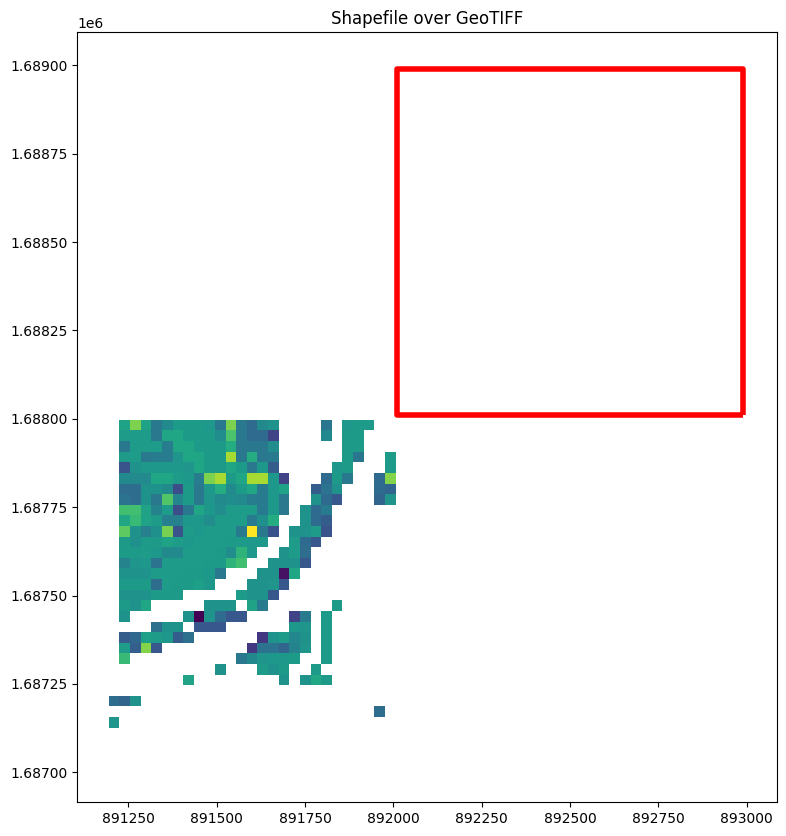

In [3]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths to your GeoTIFF and shapefile
tif_path = 'Treemap data in lidar boundary/STANDHT__Height_of_Dominant_Trees__ft__25-02-17-19-50-13.tif'
shapefile_path = 'tree_height_lidar_boundary_shapefile.shp'

# Open the GeoTIFF
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, ax=ax)

    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Ensure CRS match
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

    # Plot the shapefile
    gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=4)

    # Add labels and title
    plt.title('Shapefile over GeoTIFF')
    plt.show()

In [5]:
# open file with rasterio
raster = rasterio.open('Treemap data in lidar boundary/STANDHT__Height_of_Dominant_Trees__ft__25-02-17-19-50-13.tif')
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -32768.0,
 'width': 34,
 'height': 39,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(30.0, 0.0, 891105.0,
        0.0, -30.0, 1688085.0)}

In [1]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths to your GeoTIFF and shapefile
tif_path = 'evh_clipped_Kentucky.tif'
shapefile_path = 'tree_height_lidar_boundary_shapefile.shp'

# Open the GeoTIFF
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the GeoTIFF
    show(src, ax=ax, title='Shapefile over GeoTIFF')

    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Print CRS for debugging
    print("Shapefile CRS:", gdf.crs)
    print("GeoTIFF CRS:", src.crs)

    # Reproject shapefile to match GeoTIFF CRS
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

    # Plot the shapefile
    gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

    plt.show()


RasterioIOError: evh_clipped_Kentucky.tif: No such file or directory

CRS mismatch. Consider reprojecting the overlay GeoTIFF.


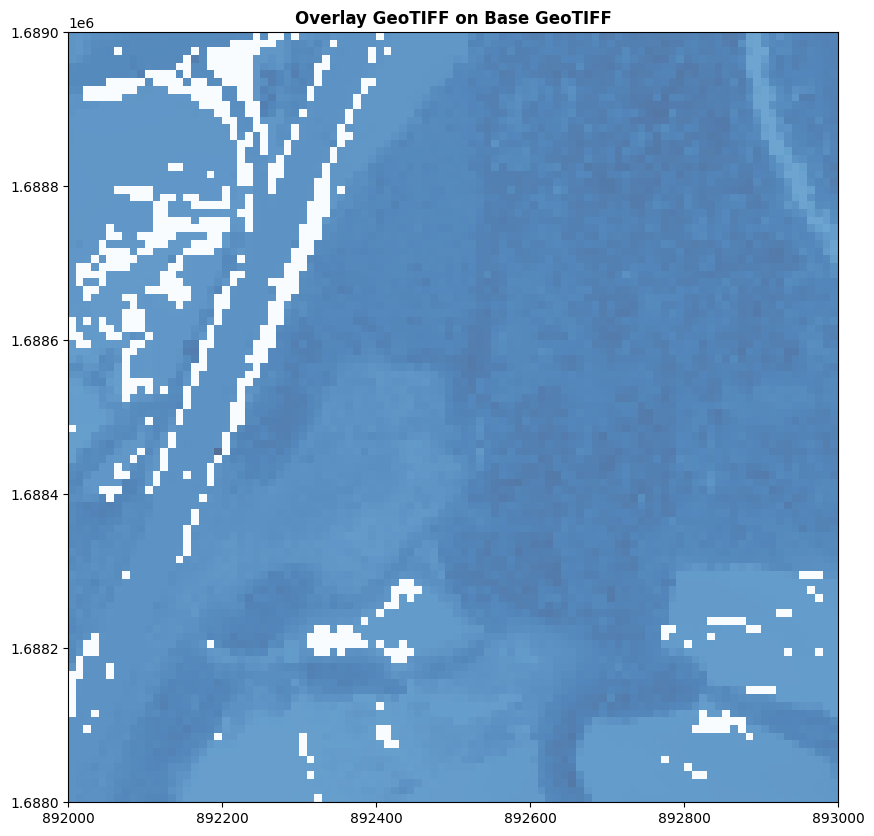

In [8]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Paths to your GeoTIFFs
base_tif_path = 'Treemap data in lidar boundary/STANDHT__Height_of_Dominant_Trees__ft__25-02-17-19-50-13.tif'
overlay_tif_path = 'tree_height.tif'

# Open the base GeoTIFF
with rasterio.open(base_tif_path) as base_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the base GeoTIFF
    show(base_src, ax=ax, title='Overlay GeoTIFF on Base GeoTIFF')

    # Open the overlay GeoTIFF
    with rasterio.open(overlay_tif_path) as overlay_src:
        # Ensure CRS match
        if base_src.crs != overlay_src.crs:
            print("CRS mismatch. Consider reprojecting the overlay GeoTIFF.")
        
        # Plot the overlay GeoTIFF with transparency
        show(overlay_src, ax=ax, cmap='Blues', alpha=0.7)

    plt.show()


# Clip Treemap data to lidar area

In [10]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import json
import os

# Paths to input and output files
tif_path = 'Treemap data in lidar boundary/STANDHT__Height_of_Dominant_Trees__ft__25-02-17-19-50-13.tif'
shapefile_path = 'tree_height_lidar_boundary_shapefile.shp'
output_tif_path = 'clipped_treemap_tree_height.tif'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Ensure the shapefile's CRS matches the raster's CRS
with rasterio.open(tif_path) as src:
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

# Convert shapefile geometry to GeoJSON format (for rasterio.mask)
shapes = [json.loads(gdf.geometry.to_json())['features'][0]['geometry']]

# Clip the raster using the shapefile polygon
with rasterio.open(tif_path) as src:
    out_image, out_transform = mask(src, shapes, crop=True)
    
    # Update metadata for the clipped raster
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

    # Save the clipped raster to a new file
    with rasterio.open(output_tif_path, "w", **out_meta) as dest:
        dest.write(out_image)

print(f"Clipped raster saved to {output_tif_path}")

Clipped raster saved to clipped_treemap_tree_height.tif


In [7]:
# open file with rasterio
raster = rasterio.open('tree_height.tif')
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 100,
 'height': 100,
 'count': 1,
 'crs': CRS.from_wkt('COMPD_CS["NAD83(2011) / Conus Albers + NAVD88 height - Geoid12B (meters)",PROJCS["NAD83(2011) / Conus Albers",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6350"]],VERT_CS["NAVD88 height",VERT_DATUM["North American Vertical Datum 1988",2005,AUTHORITY["EPS

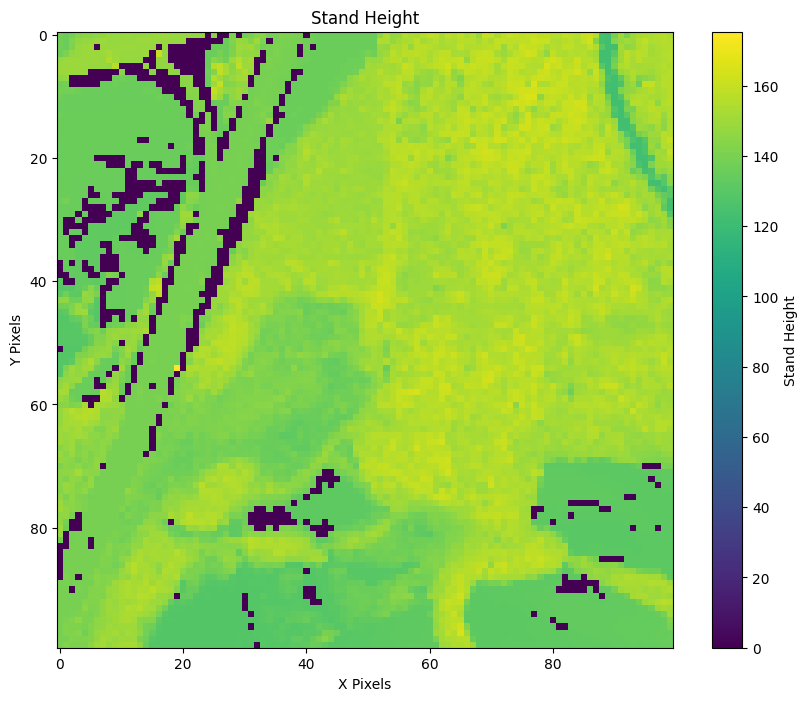

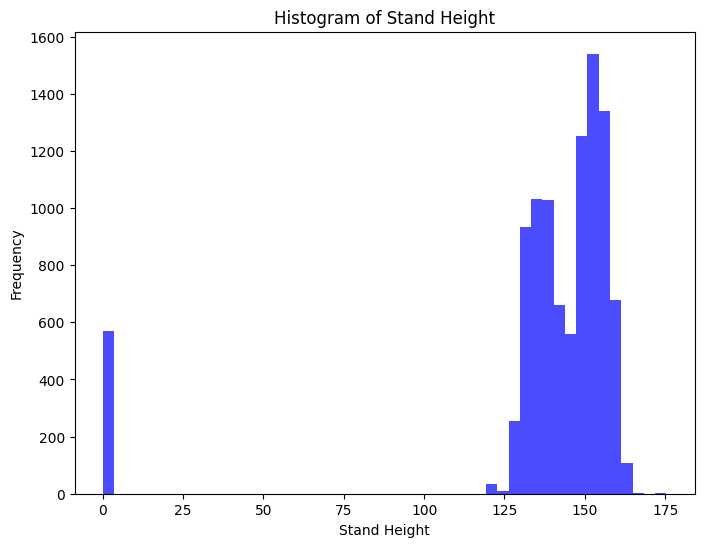

Masked GeoTIFF saved to masked_lidar_tree_height.tif


In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
geotiff_path = "tree_height.tif"
output_masked_path = "masked_lidar_tree_height.tif"

# Open the GeoTIFF file
with rasterio.open(geotiff_path, 'r+') as src:
    # Set the no-data value in the metadata
    src.nodata = -3.3999999521443642e+38
    data = src.read(1)  # Read the first band
    profile = src.profile

    # Mask no-data values and negative values
    masked_data = np.ma.masked_where((data == src.nodata) | (data < 0), data)

    # Prepare array for visualization (NaN for no-data and negative values)
    masked_array = np.where(masked_data.mask, np.nan, masked_data.filled())

    # Update metadata and write masked data to a new file (keeping nodata as zero)
    profile.update(dtype=rasterio.float32, nodata=0)
    with rasterio.open(output_masked_path, "w", **profile) as dst:
        dst.write(np.where(masked_data.mask, 0, masked_data.filled()).astype(rasterio.float32), 1)

# Plot the masked image
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # Choose a colormap

# Create the plot with a color bar, ignoring NaN values
img = plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.colorbar(img, label='Stand Height')
plt.title("Stand Height")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()

# Plot histogram of valid pixel values (excluding no-data and negatives)
plt.figure(figsize=(8, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Stand Height")
plt.xlabel("Stand Height")
plt.ylabel("Frequency")
plt.show()

print(f"Masked GeoTIFF saved to {output_masked_path}")


# Compare Treemap Heights to Lidar tree heights